# 2D Mixture Density Network

An extension of Bishops' classic MDN prediction task to 2-dimensions.

The idea in this task is to predict a the value of a two inverse sine functions simultaneously. This function has multiple real-valued solutions at each point, so the ANN model needs to have the capacity to handle this in it's loss function. An MDN is a good way to handle the predictions of these multiple output values.

This implementation owes much to the following:

- [David Ha - Mixture Density Networks with TensorFlow](http://blog.otoro.net/2015/11/24/mixture-density-networks-with-tensorflow/)
- [Mixture Density Networks in Edward](http://edwardlib.org/tutorials/mixture-density-network)

In [4]:
import keras
from context import * # imports the MDN layer 
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib notebook

## Generate Synthetic Data

Data generation

<IPython.core.display.Javascript object>


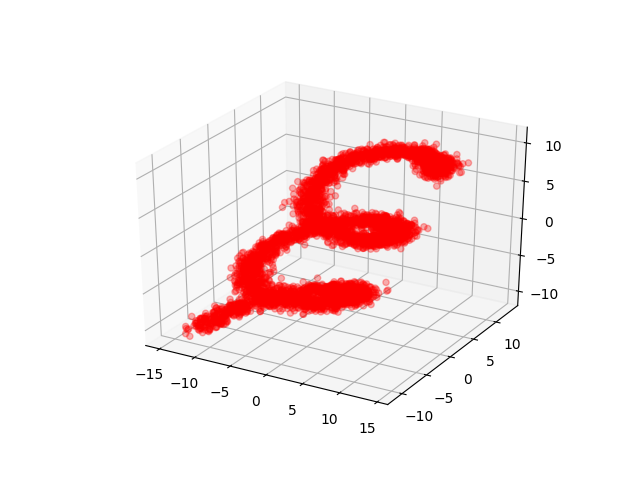

In [5]:
## Generating some data:
NSAMPLE = 5000

z_data = np.float32(np.random.uniform(-10.5, 10.5, NSAMPLE))
r_data = np.random.normal(size=NSAMPLE)
s_data = np.random.normal(size=NSAMPLE)
x_data = np.sin(0.75 * z_data) * 7.0 + z_data * 0.5 + r_data * 1.0
y_data = np.cos(0.80 * z_data) * 6.5 + z_data * 0.5 + s_data * 1.0

x_input = z_data.reshape((NSAMPLE, 1))
y_input = np.array([x_data,y_data])
y_input = y_input.T #reshape to (NSAMPLE,2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data, y_data, z_data, alpha=0.3, c='r') #c=perf_down_sampled.moving
plt.show()

## Build the MDN Model

Now we will construct the MDN model in Keras. This uses the `Sequential` model interface in Keras.

The `MDN` layer comes after one or more `Dense` layers. You need to define the output dimension and number of mixtures for the MDN like so: `MDN(output_dimension, number_mixtures)`.

For this problem, we only need an output dimension of 1 as we are predicting one value (y). Adding more mixtures adds a more parameters (model is more complex, takes longer to train), but might help make the solutions better. You can see from the training data that there are at maximum 5 different layers to predict in the curve, so setting `N_MIXES = 5` is a good place to start.

For MDNs, we have to use a special loss function that can handle the mixture parameters: the function has to take into account the number of output dimensions and mixtures.

In [6]:
N_HIDDEN = 15
N_MIXES = 10
OUTPUT_DIMS = 2

model = keras.Sequential()
model.add(keras.layers.Dense(N_HIDDEN, batch_input_shape=(None, 1), activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN, activation='relu'))
model.add(mdn.MDN(OUTPUT_DIMS, N_MIXES))
model.compile(loss=mdn.get_mixture_loss_func(OUTPUT_DIMS,N_MIXES), optimizer=keras.optimizers.Adam())
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                30        
_________________________________________________________________
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
mdn_1 (MDN)                  (None, 2)                 800       
Total params: 1,070
Trainable params: 1,070
Non-trainable params: 0
_________________________________________________________________


### Training the model

Now we train the model using Keras' normal `fit` command.

In [7]:
history = model.fit(x=x_input, y=y_input, batch_size=128, epochs=300, validation_split=0.15, callbacks=[keras.callbacks.TerminateOnNaN()])

Train on 4250 samples, validate on 750 samples
Epoch 1/300
4250/4250 [==============================] - 1s 341us/step - loss: 11.7091 - val_loss: 9.9967
Epoch 2/300
4250/4250 [==============================] - 0s 31us/step - loss: 9.1070 - val_loss: 8.1952
Epoch 3/300
4250/4250 [==============================] - 0s 30us/step - loss: 7.7619 - val_loss: 7.2943
Epoch 4/300
4250/4250 [==============================] - 0s 30us/step - loss: 7.0832 - val_loss: 6.8118
Epoch 5/300
4250/4250 [==============================] - 0s 30us/step - loss: 6.6911 - val_loss: 6.5429
Epoch 6/300
4250/4250 [==============================] - 0s 30us/step - loss: 6.4721 - val_loss: 6.3962
Epoch 7/300
4250/4250 [==============================] - 0s 30us/step - loss: 6.3383 - val_loss: 6.2927
Epoch 8/300
4250/4250 [==============================] - 0s 30us/step - loss: 6.2460 - val_loss: 6.2152
Epoch 9/300
4250/4250 [==============================] - 0s 31us/step - loss: 6.1711 - val_loss: 6.1559
Epoch 10/300
42

4250/4250 [==============================] - 0s 29us/step - loss: 3.9533 - val_loss: 4.0190
Epoch 79/300
4250/4250 [==============================] - 0s 30us/step - loss: 3.9346 - val_loss: 3.9832
Epoch 80/300
4250/4250 [==============================] - 0s 30us/step - loss: 3.9148 - val_loss: 3.9637
Epoch 81/300
4250/4250 [==============================] - 0s 30us/step - loss: 3.8906 - val_loss: 3.9386
Epoch 82/300
4250/4250 [==============================] - 0s 30us/step - loss: 3.8613 - val_loss: 3.9247
Epoch 83/300
4250/4250 [==============================] - 0s 30us/step - loss: 3.8348 - val_loss: 3.8865
Epoch 84/300
4250/4250 [==============================] - 0s 30us/step - loss: 3.8141 - val_loss: 3.8705
Epoch 85/300
4250/4250 [==============================] - 0s 30us/step - loss: 3.7960 - val_loss: 3.8659
Epoch 86/300
4250/4250 [==============================] - 0s 29us/step - loss: 3.7683 - val_loss: 3.8340
Epoch 87/300
4250/4250 [==============================] - 0s 30us/st

4250/4250 [==============================] - 0s 31us/step - loss: 3.2407 - val_loss: 3.2591
Epoch 156/300
4250/4250 [==============================] - 0s 31us/step - loss: 3.2434 - val_loss: 3.2505
Epoch 157/300
4250/4250 [==============================] - 0s 30us/step - loss: 3.2368 - val_loss: 3.2425
Epoch 158/300
4250/4250 [==============================] - 0s 36us/step - loss: 3.2386 - val_loss: 3.2470
Epoch 159/300
4250/4250 [==============================] - 0s 35us/step - loss: 3.2298 - val_loss: 3.2310
Epoch 160/300
4250/4250 [==============================] - 0s 33us/step - loss: 3.2252 - val_loss: 3.2452
Epoch 161/300
4250/4250 [==============================] - 0s 32us/step - loss: 3.2225 - val_loss: 3.2431
Epoch 162/300
4250/4250 [==============================] - 0s 30us/step - loss: 3.2140 - val_loss: 3.2363
Epoch 163/300
4250/4250 [==============================] - 0s 32us/step - loss: 3.2222 - val_loss: 3.2277
Epoch 164/300
4250/4250 [==============================] - 0

4250/4250 [==============================] - 0s 30us/step - loss: 3.1139 - val_loss: 3.1426
Epoch 233/300
4250/4250 [==============================] - 0s 30us/step - loss: 3.1017 - val_loss: 3.1273
Epoch 234/300
4250/4250 [==============================] - 0s 30us/step - loss: 3.0974 - val_loss: 3.1307
Epoch 235/300
4250/4250 [==============================] - 0s 31us/step - loss: 3.0970 - val_loss: 3.1410
Epoch 236/300
4250/4250 [==============================] - 0s 30us/step - loss: 3.1038 - val_loss: 3.1216
Epoch 237/300
4250/4250 [==============================] - 0s 30us/step - loss: 3.1023 - val_loss: 3.1273
Epoch 238/300
4250/4250 [==============================] - 0s 30us/step - loss: 3.0938 - val_loss: 3.1271
Epoch 239/300
4250/4250 [==============================] - 0s 31us/step - loss: 3.0977 - val_loss: 3.1197
Epoch 240/300
4250/4250 [==============================] - 0s 30us/step - loss: 3.0909 - val_loss: 3.1201
Epoch 241/300
4250/4250 [==============================] - 0

### Training and Validation Loss

It's interesting to see how the model trained. We can see that after a certain point improvement in training is rather slow.

For this problem a loss value around 3.0 produces quite good results.

<IPython.core.display.Javascript object>


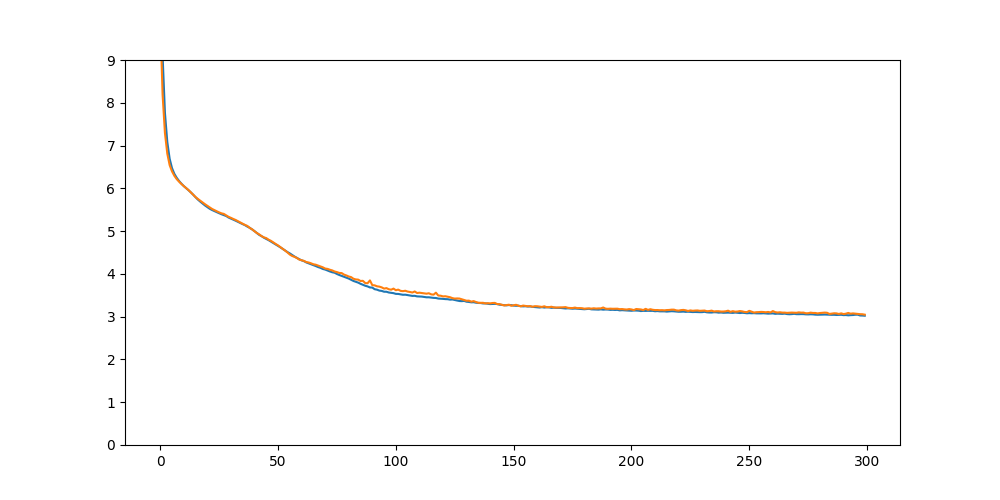

In [8]:
plt.figure(figsize=(10, 5))
plt.ylim([0,9])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## Sampling Functions

The MDN model outputs parameters of a mixture model---a list of means (mu), variances (sigma), and weights (pi).

The MDN package contains some functions to split up these parameters and sample from the normal distributions that they form.

We use 


## Try out the MDN Model

Now we try out the model by making predictions at 3000 evenly spaced points on the x-axis. 

Mixture models output lists of parameters, so we're going to sample from these parameters for each point on the x-axis, and also try plotting the parameters themselves so we can have some insight into what the model is learning!

In [22]:
## Sample on some test data:
x_test = np.float32(np.arange(-15,15,0.1))
NTEST = x_test.size
print("Testing:", NTEST, "samples.")
x_test = x_test.reshape(NTEST,1) # needs to be a matrix, not a vector

# Make predictions from the model
y_test = model.predict(x_test)
# y_test contains parameters for distributions, not actual points on the graph.
# To find points on the graph, we need to sample from each distribution.

# Split up the mixture parameters (for future fun)
mus = np.apply_along_axis((lambda a: a[:N_MIXES*OUTPUT_DIMS]),1, y_test)
sigs = np.apply_along_axis((lambda a: a[N_MIXES*OUTPUT_DIMS:2*N_MIXES*OUTPUT_DIMS]),1, y_test)
pis = np.apply_along_axis((lambda a: softmax(a[-N_MIXES:])),1, y_test)

# Sample from the predicted distributions
y_samples = np.apply_along_axis(sample_from_output, 1, y_test, N_MIXES,OUTPUT_DIMS,temp=1.0)

Testing: 300 samples.


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


<IPython.core.display.Javascript object>


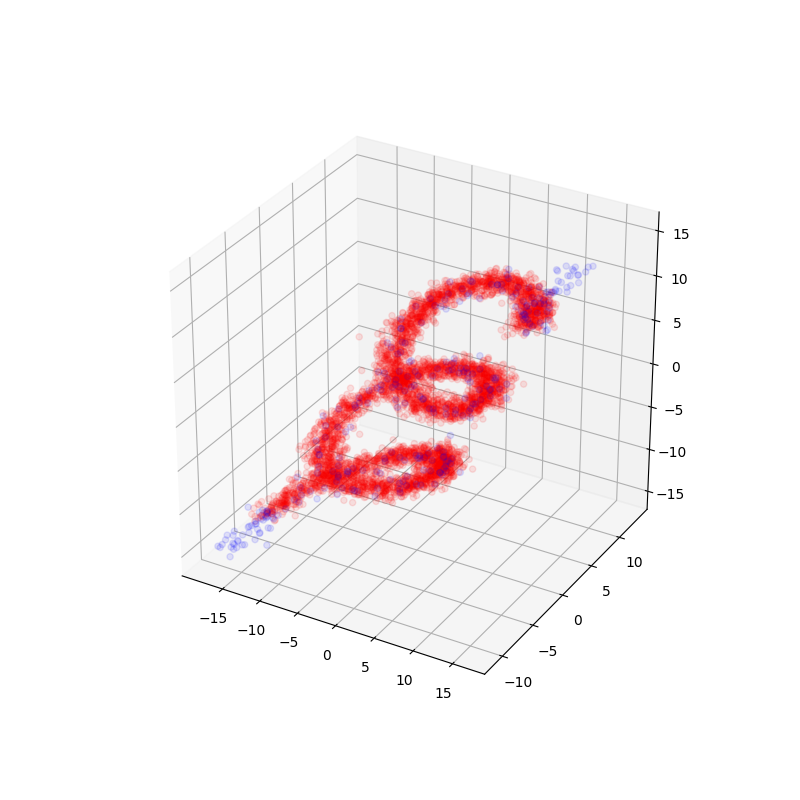

In [29]:
# Plot the predicted samples.
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data, y_data, z_data, alpha=0.1, c='r') #c=perf_down_sampled.moving
ax.scatter(y_samples.T[0], y_samples.T[1], x_test, alpha=0.1, c='b') #c=perf_down_sampled.moving
plt.show()

<IPython.core.display.Javascript object>


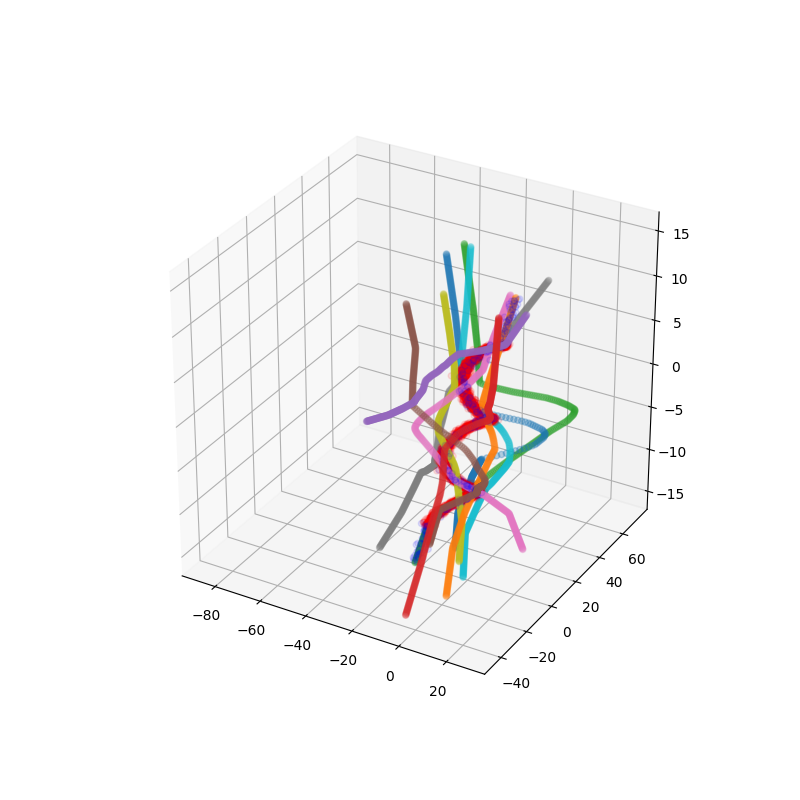

In [30]:
# Plot the means - this gives us some insight into how the model learns to produce the mixtures.
# Cool!

# Plot the predicted samples.
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data, y_data, z_data, alpha=0.1, c='r') #c=perf_down_sampled.moving
ax.scatter(y_samples.T[0], y_samples.T[1], x_test, alpha=0.1, c='b') #c=perf_down_sampled.moving
for m in range(N_MIXES):
    one_pair = mus[m*OUTPUT_DIMS:(m+1)*OUTPUT_DIMS]
    ax.scatter(mus[:,2*m], mus[:,2*m + 1] , x_test, marker='o',alpha=0.3)
plt.show()

<IPython.core.display.Javascript object>


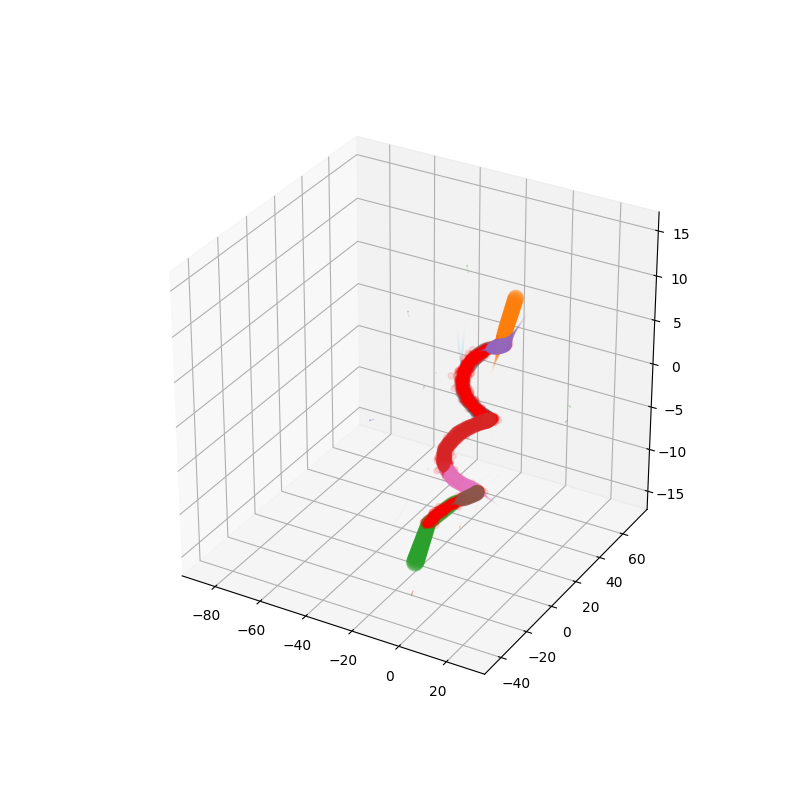

In [31]:
# Let's plot the variances and weightings of the means as well.

# Plot the predicted samples.
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data, y_data, z_data, alpha=0.1, c='r') #c=perf_down_sampled.moving
for m in range(N_MIXES):
    one_pair = mus[m*OUTPUT_DIMS:(m+1)*OUTPUT_DIMS]
    ax.scatter(mus[:,2*m], mus[:,2*m + 1] , x_test, s=100*sigs[:,2*m]*pis[:,m], marker='o',alpha=0.3)
plt.show()